![](https://basegroup.ru/sites/default/files/treegraph.gif)

![](http://qaru.site/img/bd1fac60c2af71b7f187b66fe60a9df3.png)

## Энтропия

$H(p) = -\sum_{k=1}^{K} p_k \log_2 p_k $

In [3]:
%pylab inline
import numpy as np
import pandas as pd
import pylab as plt

Populating the interactive namespace from numpy and matplotlib


In [4]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))


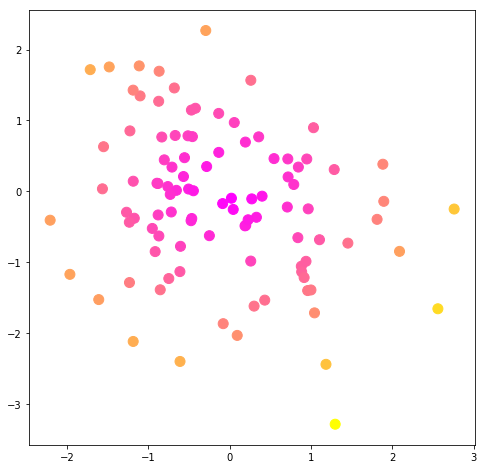

In [5]:
data_x = np.random.normal(size=(100, 2))
data_y = (data_x[:, 0] ** 2 + data_x[:, 1] ** 2) ** 0.5
plt.figure(figsize=(8, 8))
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='spring')


In [7]:
from sklearn.tree import DecisionTreeRegressor

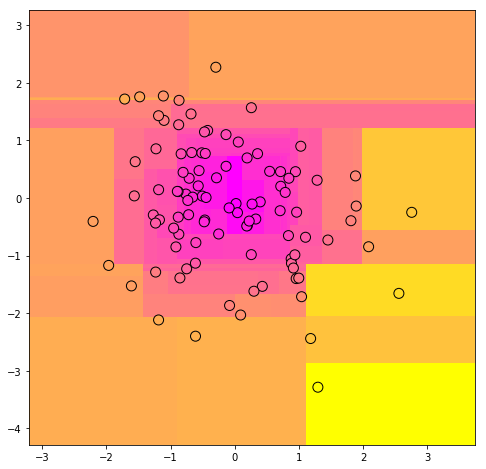

In [8]:
clf = DecisionTreeRegressor()
clf.fit(data_x, data_y)

xx, yy = get_grid(data_x)

predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.pcolormesh(xx, yy, predicted, cmap='spring')
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='spring', edgecolor='k')

In [10]:
# гиперпараметры

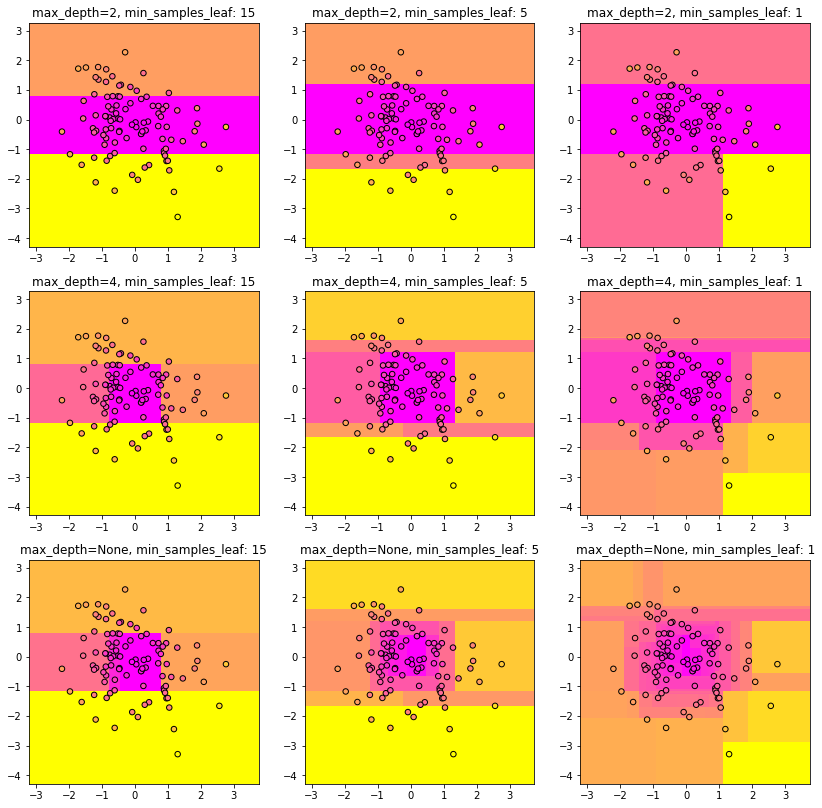

In [9]:
plt.figure(figsize=(14, 14))
for i, max_depth in enumerate([2, 4, None]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):
        clf = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        clf.fit(data_x, data_y)
        xx, yy = get_grid(data_x)
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
        plt.subplot2grid((3, 3), (i, j))
        plt.pcolormesh(xx, yy, predicted, cmap='spring')
        plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=30, cmap='spring', edgecolor='k')
        plt.title('max_depth=' + str(max_depth) + ', min_samples_leaf: ' + str(min_samples_leaf))

Для любой непротиворечивой обучающей выборки можно построить решающее дерево, которое имеет нулевую ошибку на данной выборке. Если мы рассмотрим объекты, как точки в пространстве признаков, то каждую эту точку можно ограничить n-мерным кубиком, который не будет содержать других точек. n-мерный кубик прекрасно можно задать деревом

Решающие деревья — это алгоритмы, неустойчивые к изменениям обучающей выборки, т.е. при малейших её изменениях итоговый классификатор может радикально измениться. Посмотрим, как будет меняться структура дерева при обучении на разных 90%-х подвыборках.


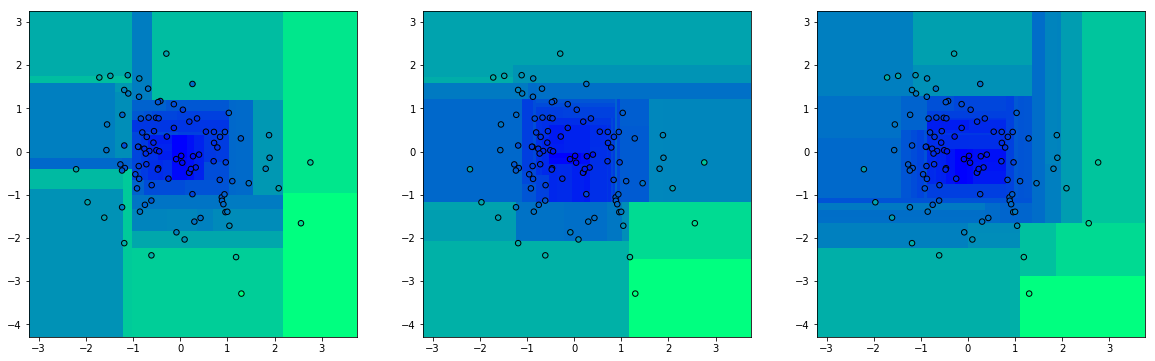

In [11]:
plt.figure(figsize=(20, 6))
for i in range(3):
    clf = DecisionTreeRegressor(random_state=42)

    indecies = np.random.randint(data_x.shape[0], size=int(data_x.shape[0] * 0.9))
    clf.fit(data_x[indecies], data_y[indecies])
    xx, yy = get_grid(data_x)
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.subplot2grid((1, 3), (0, i))
    plt.pcolormesh(xx, yy, predicted, cmap='winter')
    plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=30, cmap='winter', edgecolor='k')


Посмотрим на качество дерева в зависимости от параметров на одном из стандартных наборов данных - Бостонском датасете.

Загрузим датасет и посмотрим на него.



In [13]:
from sklearn.datasets import load_boston
data = load_boston()
data.DESCR


"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [14]:
X = data.data
y = data.target

In [20]:
# Кросс валидация

from sklearn.model_selection import KFold, cross_val_score
cv = KFold(shuffle=True)

In [21]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(random_state=241)
-cross_val_score(regr, X, y, cv=cv, 
                 scoring='neg_mean_squared_error').mean()

20.116534939419555

In [22]:
regr.fit(X, y)
regr.tree_

In [29]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor()
-cross_val_score(regr, X, y, cv=cv, 
                scoring='neg_mean_absolute_error').mean()

2.9884321874706488

In [33]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(DecisionTreeRegressor(),
                  param_grid={'max_features': [None, 'log2', 'sqrt'], 
                              'max_depth': [2, 4, 6, 8, 10, 20, 50]},
                  cv=cv,
                  scoring='r2')
gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [None, 'log2', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [36]:
gs.best_score_

0.79258740867105049

In [37]:
gs.best_params_

{'max_depth': 6, 'max_features': None}

Чтобы уменьшить влияние рассмотренных недостатков решающих деревьев, используют случайные леса (random forest). Одно дерево может ошибаться, поэтому давайте построим много деревьев и "усредним" их ответы.

Если строить все эти леса по одной и той же обучающей выборке, они будут одинаковые, поэтому для каждого решающего дерева, которое мы строим:

вместо исходной обучающей выборки $X$ используется бутстрап (т.е. выборка $l$ объектов с возвращениями);
в каждой внутренней вершине выбор условия осуществляется не среди всех признаков, а среди $q$ случайно выбранных.

Такая рандомизация обеспечит нам различность деревьев. После того, как таким образом были получены алгоритмы $b_1(x), ... b_N(x)$ можно построить итоговый алгоритм как:

выбор большинства в случае классификации: $a(x) = \arg \max_{y \in \mathbb{Y}} \sum_{n=1}^N [b_n(x) = y]$

среднее в случае регрессии: $a(x) = \frac{1}{N} \sum_{n = 1}^N b_n(x)$

Для начала посмотрим, как выглядит разделение плоскости для случайного леса на модельной задаче.



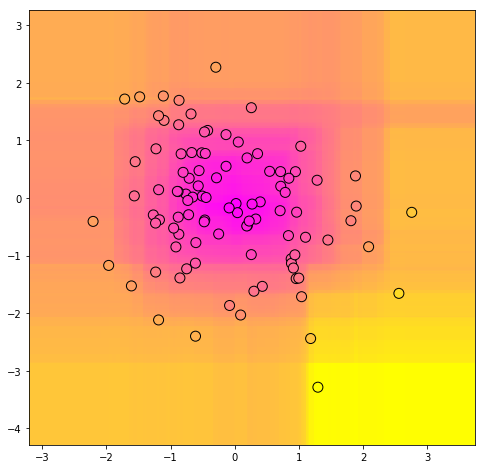

In [38]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=100)
clf.fit(data_x, data_y)

xx, yy = get_grid(data_x)

predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.pcolormesh(xx, yy, predicted, cmap='spring')
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='spring', edgecolor='k')

Видно, что в целом переходы гораздо более плавные.

Теперь вернемся к Бостонскому датасету и посмотрим, какое качество можно получить при использовании различных способов усреднения деревьев.

Обычное решающее дерево



In [42]:
regr = DecisionTreeRegressor()
print(cross_val_score(regr, X, y, cv=cv,
                      scoring='neg_mean_absolute_error').mean())

-3.16877641589


In [43]:
from sklearn.ensemble import BaggingRegressor

In [44]:
regr = BaggingRegressor(DecisionTreeRegressor(), n_estimators=10,
                        bootstrap=False, random_state=241)
print(cross_val_score(regr, X, y, cv=cv,
                      scoring='neg_mean_absolute_error').mean())


-2.93688797314


In [45]:
regr = BaggingRegressor(DecisionTreeRegressor(), n_estimators=10,
                        bootstrap=False, random_state=241,
                        max_samples=0.707)
print(cross_val_score(regr, X, y, cv=cv,
                      scoring='neg_mean_absolute_error').mean())

-2.36205433455


In [46]:
regr = BaggingRegressor(DecisionTreeRegressor(), n_estimators=100,
                        bootstrap=False, random_state=241,
                        max_samples=0.5)
print(cross_val_score(regr, X, y, cv=cv,
                      scoring='neg_mean_absolute_error').mean())


-2.31144518409


In [48]:
regr = BaggingRegressor(DecisionTreeRegressor(), n_estimators=1000,
                        bootstrap=False, random_state=241,
                        max_samples=0.5)
print(cross_val_score(regr, X, y, cv=cv,
                      scoring='neg_mean_absolute_error').mean())


-2.36221310111


In [49]:
# титаник с деревьями